# Clustering Categorical Data 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

<b> Already done that? Okay! </b>
    
There are other features: name and continent. 

Encode the continent one and use it in the clustering solution. Think about the difference with the previous exercise.

## Import the relevant libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Load the data

Load data from the csv file: <i> 'Categorical.csv'</i>.

In [3]:
data= pd.read_csv('Categorical.csv',index_col='name')
data

,Longitude,Latitude,continent
name,,,
Aruba,-69.982677,12.520880,North America
Afghanistan,66.004734,33.835231,Asia
Angola,17.537368,-12.293361,Africa
Anguilla,-63.064989,18.223959,North America
Albania,20.049834,41.142450,Europe
...,...,...,...
Samoa,-172.164851,-13.753243,Oceania
Yemen,47.586762,15.909280,Asia
South Africa,25.083901,-29.000341,Africa


Remove the duplicate index column from the dataset. 

In [4]:
data.drop_duplicates()

,Longitude,Latitude,continent
name,,,
Aruba,-69.982677,12.520880,North America
Afghanistan,66.004734,33.835231,Asia
Angola,17.537368,-12.293361,Africa
Anguilla,-63.064989,18.223959,North America
Albania,20.049834,41.142450,Europe
...,...,...,...
Samoa,-172.164851,-13.753243,Oceania
Yemen,47.586762,15.909280,Asia
South Africa,25.083901,-29.000341,Africa


## Map the data

Use the <i>'continent'</i> category for this analysis.

In [11]:
Map=LabelEncoder()
data['conti']=Map.fit_transform(data['continent'])

## Select the features
x=data[['Longitude','Latitude','conti']]

In [12]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

## Clustering

Use 4 clusters initially.

In [14]:
kmeans=KMeans(4)
kmeans.fit(x_scaler)

C:\Users\Darkspider\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darkspider\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

## Clustering results

In [15]:
identified_clusters = kmeans.fit_predict(x_scaler)
identified_clusters

C:\Users\Darkspider\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Darkspider\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 2, 3, 3, 1, 3, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 3, 0, 2, 2, 0, 1, 0, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 2, 2,
       0, 0, 2, 0, 3, 1, 0, 0, 3, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 1,
       3, 1, 0, 3, 1, 0, 1, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0,
       0, 1, 2, 0, 0, 2, 3, 1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 2, 1, 3, 2, 3,
       2, 3, 2, 3, 2, 1, 1, 0, 0, 0, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 3, 1, 1, 3, 2, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 0, 0, 2, 1, 3, 0, 1, 2, 2, 0, 0, 0, 3, 1, 1, 2,
       0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 0, 2, 2, 2])

In [16]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Longitude,Latitude,continent,conti,Cluster
name,,,,,
Aruba,-69.982677,12.520880,North America,4,1
Afghanistan,66.004734,33.835231,Asia,2,0
Angola,17.537368,-12.293361,Africa,0,2
Anguilla,-63.064989,18.223959,North America,4,1
Albania,20.049834,41.142450,Europe,3,0
...,...,...,...,...,...
Samoa,-172.164851,-13.753243,Oceania,5,1
Yemen,47.586762,15.909280,Asia,2,0
South Africa,25.083901,-29.000341,Africa,0,2


## Plot the data

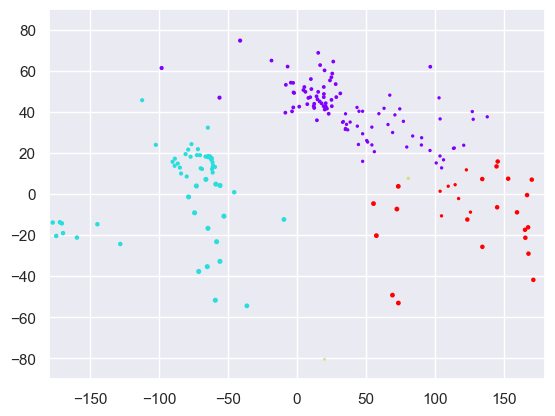

In [21]:
plt.scatter(data['Longitude'], data['Latitude'],data['conti'],c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90, 90)
plt.show()

Since you already have all the code necessary, go back and play around with the number of clusters. Try 3, 7 and 8 and see if the results match your expectations. 

Simply go back to the beggining of the <b> Clustering </b> section and change <i> kmeans = KMeans(4) </i> to <i> kmeans = KMeans(3) </i>. Then run the remaining cells until the end.